# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

**Признаки**


- DateCrawled — дата скачивания анкеты из базы
- VehicleType — тип автомобильного кузова
- RegistrationYear — год регистрации автомобиля
- Gearbox — тип коробки передач
- Power — мощность (л. с.)
- Model — модель автомобиля
- Kilometer — пробег (км)
- RegistrationMonth — месяц регистрации автомобиля
- FuelType — тип топлива
- Brand — марка автомобиля
- Repaired — была машина в ремонте или нет
- DateCreated — дата создания анкеты
- NumberOfPictures — количество фотографий автомобиля
- PostalCode — почтовый индекс владельца анкеты (пользователя)
- LastSeen — дата последней активности пользователя


**Целевой признаки**


Price — цена (евро)

## Подготовка данных

### Изучение данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')


<div class="alert alert-block alert-success">
<b>Успех:</b> Импорты собраны на месте
</div>

In [2]:
df = pd.read_csv('/datasets/autos.csv')
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [3]:
df['DateCreated'].unique()

array(['2016-03-24 00:00:00', '2016-03-14 00:00:00',
       '2016-03-17 00:00:00', '2016-03-31 00:00:00',
       '2016-04-04 00:00:00', '2016-04-01 00:00:00',
       '2016-03-21 00:00:00', '2016-03-26 00:00:00',
       '2016-04-07 00:00:00', '2016-03-15 00:00:00',
       '2016-03-11 00:00:00', '2016-03-20 00:00:00',
       '2016-03-23 00:00:00', '2016-03-27 00:00:00',
       '2016-03-12 00:00:00', '2016-03-13 00:00:00',
       '2016-03-18 00:00:00', '2016-03-10 00:00:00',
       '2016-03-07 00:00:00', '2016-03-09 00:00:00',
       '2016-03-08 00:00:00', '2016-04-03 00:00:00',
       '2016-03-29 00:00:00', '2016-03-25 00:00:00',
       '2016-03-28 00:00:00', '2016-03-30 00:00:00',
       '2016-03-22 00:00:00', '2016-02-09 00:00:00',
       '2016-03-05 00:00:00', '2016-04-02 00:00:00',
       '2016-03-16 00:00:00', '2016-03-19 00:00:00',
       '2016-04-05 00:00:00', '2016-03-06 00:00:00',
       '2016-02-12 00:00:00', '2016-03-03 00:00:00',
       '2016-03-01 00:00:00', '2016-03-04 00:0

In [4]:
df.duplicated().sum()

4

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [6]:
df.isna().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
Repaired             71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

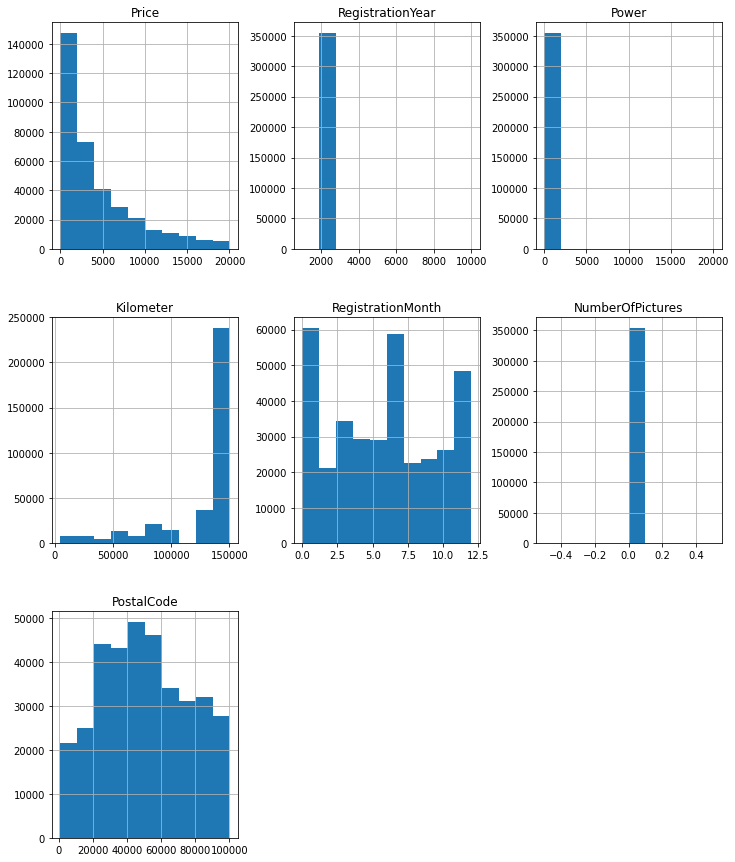

In [7]:
df.hist(figsize=(12,15));

### Удаление ненужных столбцов и форматирование названий

Некоторые признаки не влияют на цену автомобиля, поэтому удаляю их.

In [8]:
df.drop(["DateCrawled","DateCreated","LastSeen","NumberOfPictures","PostalCode"],axis = 1, inplace = True)


<div class="alert alert-block alert-success">
<b>Успех:</b> Удалить неинформативные признаки - хорошее решение.
</div>

In [9]:
df.columns = df.columns.str.lower()

In [10]:
df = df.rename(columns={'vehicletype':'vehicle_type', 
                        'registrationyear':'registration_year', 
                        'registrationmonth':'registration_month', 
                        'fueltype':'fuel_type', 
                        'notrepaired':'not_repaired'})

In [11]:
df

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired
0,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no
...,...,...,...,...,...,...,...,...,...,...,...
354364,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes
354365,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN
354366,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no
354367,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no


### Устранение аномалий и заполнение значений

#### Цена

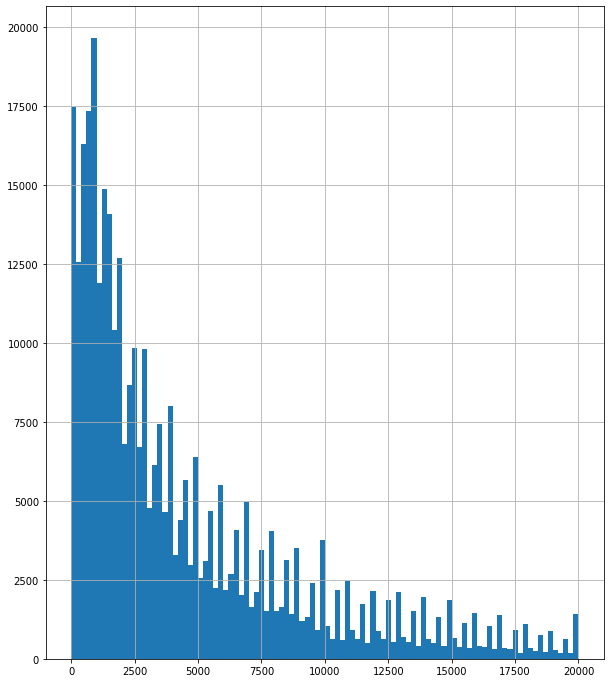

In [12]:
df['price'].hist(bins = 100, figsize=(10,12));

In [13]:
df[df['price']==0].shape[0]

10772

In [14]:
df['price'].quantile([.10, .975])

0.100      499.0
0.975    16900.0
Name: price, dtype: float64

В данных 10772 нулевых значений, а также много околонулевых. Это будет мешать обучению модели, поэтому удалим их используя 10 и 97,5 квартили 

In [15]:
df = df.query('499 <= price <= 16900')

#### Год и месяц регистрации автомобиля

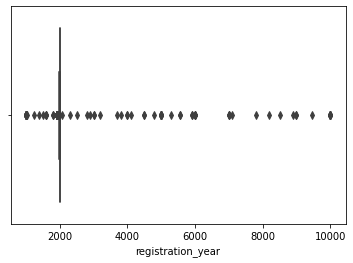

In [16]:
sns.boxplot(df['registration_year']);

In [17]:
df['registration_year'].describe()

count    310380.000000
mean       2003.961769
std          62.592744
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: registration_year, dtype: float64

Первая машина появилась в 1886 году, а данные позже 2016 некорректны. 

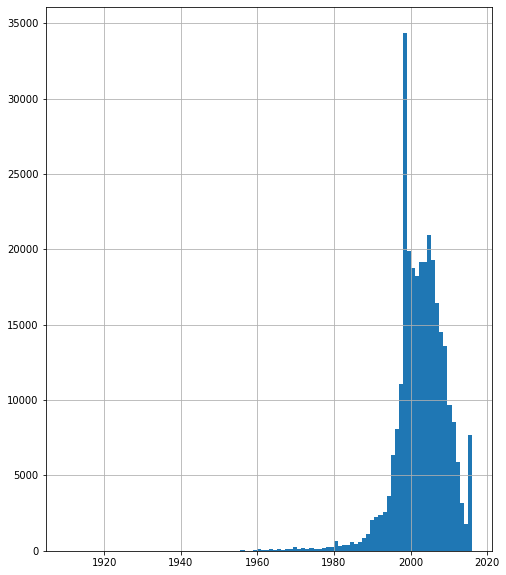

In [18]:
df = df.query('1886 < registration_year < 2017')
df['registration_year'].hist(bins = 100, figsize=(8,10));

Машины 60х годов все еще могут быть на ходу, поэтому оставим левой границей 1960 год

In [19]:
df = df.query('1960 < registration_year < 2017')

In [20]:
df['registration_month'].value_counts()

3     29911
6     27351
5     25230
4     25187
7     23682
10    22950
0     21614
11    21188
12    21180
9     20919
1     19805
8     19746
2     18342
Name: registration_month, dtype: int64

0 - вероятно ошибка, заменим 0 на 1.

In [21]:
df.loc[df['registration_month'] == 0, 'registration_month'] = 1

#### Мощность 

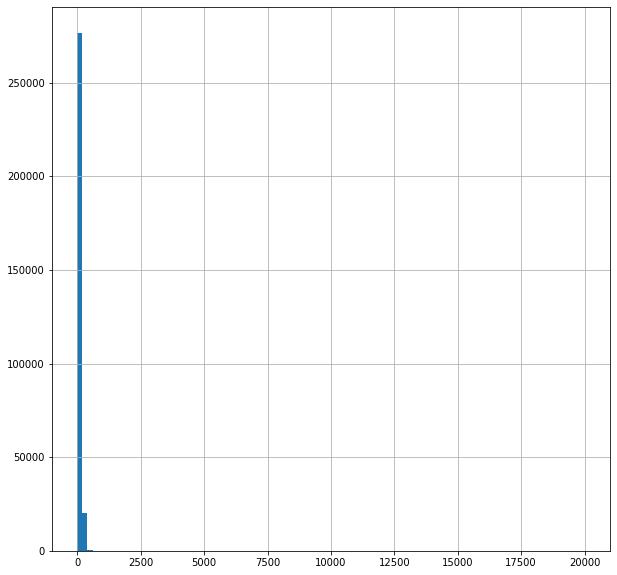

In [22]:
df['power'].hist(bins = 100, figsize=(10,10));

Здесь видно не только много нулевых значений, но и огромный размах, посмотрим на данные при границе в 500.

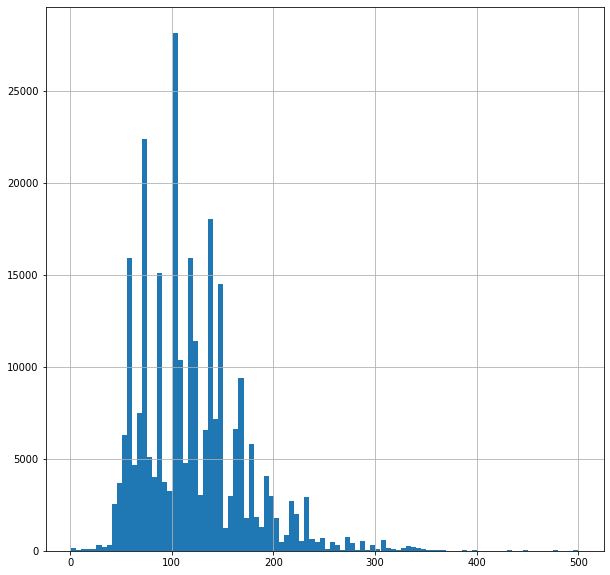

In [23]:
df.query('0 < power < 501')['power'].hist(bins=100, figsize=(10,10));

По графику логично ограничить мощность 370. Минимум возьмем 25 л. с.

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'registration_year'}>],
       [<AxesSubplot:title={'center':'power'}>,
        <AxesSubplot:title={'center':'kilometer'}>],
       [<AxesSubplot:title={'center':'registration_month'}>,
        <AxesSubplot:>]], dtype=object)

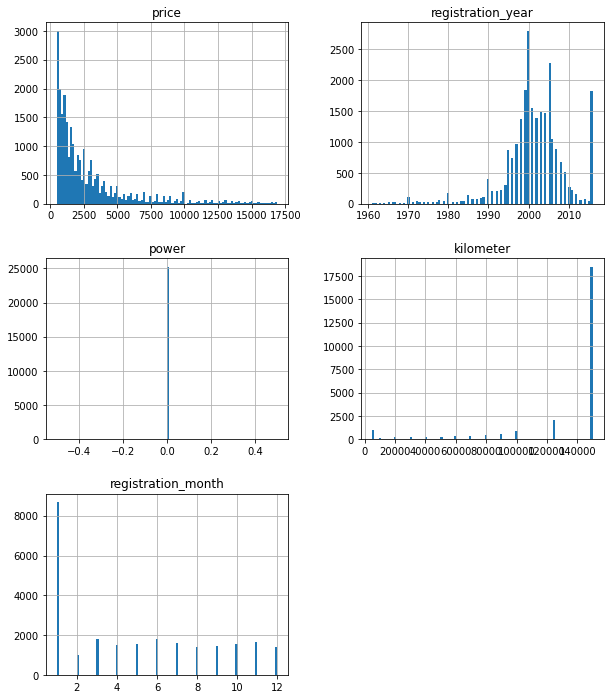

In [24]:
df[df['power']==0].hist(bins = 100, figsize=(10,12))

In [25]:
df = df.query('24 < power < 371')

####  Модель, ремонт и коробка передач

In [26]:
df['gearbox'].mode()

0    manual
dtype: object

In [27]:
df.fillna({'gearbox':'manual', 
           'repaired':'no',
           'model':'unknown'},
          inplace=True)

In [28]:
df['repaired'].unique()

array(['no', 'yes'], dtype=object)

In [29]:
df['gearbox'].unique()

array(['auto', 'manual'], dtype=object)

In [30]:
df['repaired'].value_counts()

no     247804
yes     22986
Name: repaired, dtype: int64

In [31]:
df['gearbox'].value_counts()

manual    217285
auto       53505
Name: gearbox, dtype: int64

In [32]:
df.isna().sum()

price                     0
vehicle_type           8409
registration_year         0
gearbox                   0
power                     0
model                     0
kilometer                 0
registration_month        0
fuel_type             12607
brand                     0
repaired                  0
dtype: int64

#### Тип автомобильного кузова и топлива

создадим словарь, где будет храниться самый популярный кузов/тип толива для модели опредленного бренда на этой площадке. Пропуски будем заполнять по этому словарю. 

In [33]:
vehicle_brand = df.pivot_table(index=['vehicle_type'], 
                               columns=['brand', 'model'],
                               values=['price'],
                               aggfunc=['count'])
fuel_brand = df.pivot_table(index=['fuel_type'], 
                            columns=['brand', 'model'],
                            values=['price'],
                            aggfunc=['count'])

In [34]:
vehicle_brand

count                                                    \
                  price                                                     
brand        alfa_romeo                                              audi   
model               145    147    156    159  other spider unknown    100   
vehicle_type                                                                
bus                 NaN    NaN    NaN    NaN    NaN    NaN     NaN    NaN   
convertible         NaN    NaN    NaN    NaN    NaN  153.0     NaN    1.0   
coupe               1.0   24.0    2.0    NaN  169.0    1.0    13.0    2.0   
other               1.0    6.0    NaN    NaN    NaN    NaN     1.0    NaN   
sedan              10.0  343.0  209.0   52.0  151.0    NaN    19.0  229.0   
small              12.0   76.0    1.0    NaN  109.0    NaN     4.0    NaN   
suv                 NaN    NaN    NaN    NaN    NaN    NaN     NaN    NaN   
wagon               NaN    2.0  253.0  139.0    6.0    NaN    12.0   86.0   

                           ...                                              \
                           ...                                               
brand                      ...  volvo                                        
model          200     80  ...    850 c_reihe  other    s60 unknown    v40   
vehicle_type               ...                                               
bus            NaN    NaN  ...    NaN     NaN    NaN    NaN     NaN    NaN   
convertible    1.0  146.0  ...    NaN    67.0    2.0    NaN     NaN    NaN   
coupe          NaN   42.0  ...    NaN    40.0   22.0    NaN     NaN    NaN   
other          NaN    3.0  ...    NaN     2.0    1.0    NaN     NaN    NaN   
sedan         14.0  710.0  ...   14.0    65.0  325.0  135.0    13.0   10.0   
small          NaN    1.0  ...    NaN     3.0    3.0    NaN     NaN    NaN   
suv            NaN    NaN  ...    NaN     NaN    2.0    NaN     NaN    NaN   
wagon          1.0  155.0  ...  142.0     NaN  118.0    NaN    34.0  519.0   

                                           
                                           
brand                                      
model           v50   v60    v70 xc_reihe  
vehicle_type                               
bus             NaN   NaN    NaN      NaN  
convertible     NaN   NaN    NaN      NaN  
coupe           NaN   NaN    1.0      NaN  
other           NaN   NaN    NaN      NaN  
sedan           1.0   3.0    NaN      3.0  
small           NaN   NaN    NaN      NaN  
suv             NaN   NaN    NaN    176.0  
wagon         237.0  22.0  548.0     36.0  

[8 rows x 336 columns]

In [35]:
#пример заполнения словаря
vehicle_brand_dict={}
for col in vehicle_brand.columns:
    temp = col[2] + col[3]
    vehicle_brand_dict[temp] = vehicle_brand[col].idxmax()
vehicle_brand_dict

{'alfa_romeo145': 'small',
 'alfa_romeo147': 'sedan',
 'alfa_romeo156': 'wagon',
 'alfa_romeo159': 'wagon',
 'alfa_romeoother': 'coupe',
 'alfa_romeospider': 'convertible',
 'alfa_romeounknown': 'sedan',
 'audi100': 'sedan',
 'audi200': 'sedan',
 'audi80': 'sedan',
 'audi90': 'sedan',
 'audia1': 'small',
 'audia2': 'small',
 'audia3': 'sedan',
 'audia4': 'wagon',
 'audia5': 'coupe',
 'audia6': 'wagon',
 'audia8': 'sedan',
 'audiother': 'convertible',
 'audiq3': 'suv',
 'audiq5': 'suv',
 'audiq7': 'suv',
 'auditt': 'coupe',
 'audiunknown': 'wagon',
 'bmw1er': 'sedan',
 'bmw3er': 'sedan',
 'bmw5er': 'sedan',
 'bmw6er': 'coupe',
 'bmw7er': 'sedan',
 'bmwi3': 'sedan',
 'bmwm_reihe': 'coupe',
 'bmwother': 'sedan',
 'bmwunknown': 'sedan',
 'bmwx_reihe': 'suv',
 'bmwz_reihe': 'convertible',
 'chevroletaveo': 'small',
 'chevroletcaptiva': 'suv',
 'chevroletmatiz': 'small',
 'chevroletother': 'suv',
 'chevroletspark': 'small',
 'chevroletunknown': 'sedan',
 'chrysler300c': 'wagon',
 'chryslercr

Для применения функции map к Series создадим столбец brand_model. После заполнения мы его удалим

In [36]:
df['brand_model'] = df['brand'] + df['model']
df['brand_model']

2                     jeepgrand
3                volkswagengolf
4                    skodafabia
5                        bmw3er
6                peugeot2_reihe
                  ...          
354361            alfa_romeo159
354362                 seatleon
354366              smartfortwo
354367    volkswagentransporter
354368           volkswagengolf
Name: brand_model, Length: 270790, dtype: object

In [37]:
def model_filling(pivot_table, df, col1):
    frequency = {}
    for col in pivot_table.columns:
        temp = col[2] + col[3]
        frequency[temp] = pivot_table[col].idxmax()
    df[col1] = df[col1].fillna(df['brand_model'].map(frequency))

In [38]:
model_filling(vehicle_brand, df, 'vehicle_type')
model_filling(fuel_brand, df, 'fuel_type')

In [39]:
df.isna().sum()

price                 0
vehicle_type          0
registration_year     0
gearbox               0
power                 0
model                 0
kilometer             0
registration_month    0
fuel_type             0
brand                 0
repaired              0
brand_model           0
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270790 entries, 2 to 354368
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   price               270790 non-null  int64 
 1   vehicle_type        270790 non-null  object
 2   registration_year   270790 non-null  int64 
 3   gearbox             270790 non-null  object
 4   power               270790 non-null  int64 
 5   model               270790 non-null  object
 6   kilometer           270790 non-null  int64 
 7   registration_month  270790 non-null  int64 
 8   fuel_type           270790 non-null  object
 9   brand               270790 non-null  object
 10  repaired            270790 non-null  object
 11  brand_model         270790 non-null  object
dtypes: int64(5), object(7)
memory usage: 26.9+ MB


In [41]:
df.drop(['brand_model'], axis = 1, inplace = True)

### Оптимизация датафрейма

In [42]:
df.gearbox.unique()

array(['auto', 'manual'], dtype=object)

In [43]:
df.repaired.unique()        

array(['no', 'yes'], dtype=object)

In [44]:
df.replace({'gearbox': {'auto': True, 'manual': False}, 
            'repaired': {'yes': True, 'no': False}}, 
           inplace=True)
df['gearbox'].astype('bool')
df['repaired'].astype('bool')

2         False
3         False
4         False
5          True
6         False
          ...  
354361    False
354362     True
354366    False
354367    False
354368    False
Name: repaired, Length: 270790, dtype: bool

In [45]:
df['price'] = pd.to_numeric(df['price'], downcast='integer')
df['registration_year'] = pd.to_numeric(df['registration_year'], downcast='integer')
df['power'] = pd.to_numeric(df['power'], downcast='integer')
df['kilometer'] = pd.to_numeric(df['kilometer'], downcast='integer')
df['registration_month'] = pd.to_numeric(df['registration_month'], downcast='integer')
df['kilometer'] = pd.to_numeric(df['kilometer'], downcast='integer')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270790 entries, 2 to 354368
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   price               270790 non-null  int16 
 1   vehicle_type        270790 non-null  object
 2   registration_year   270790 non-null  int16 
 3   gearbox             270790 non-null  bool  
 4   power               270790 non-null  int16 
 5   model               270790 non-null  object
 6   kilometer           270790 non-null  int32 
 7   registration_month  270790 non-null  int8  
 8   fuel_type           270790 non-null  object
 9   brand               270790 non-null  object
 10  repaired            270790 non-null  bool  
dtypes: bool(2), int16(3), int32(1), int8(1), object(4)
memory usage: 13.7+ MB


### Бонус-фича по возрасту

FIVA (Fédération Internationale des Véhicules Anciens) выделяет следующие категории старинных автомобилей по годам выпуска:

- Class A (Ancestor) — выпуска до 31 декабря 1904 года
- Class B (Veteran) — с 1 января 1905 по 31 декабря 1918
- Class C (Vintage) — с 1 января 1919 по 31 декабря 1930
- Class D (Post Vintage) — с 1 января 1931 по 31 декабря 1945
- Class E (Post War) — с 1 января 1946 по 31 декабря 1960
- Class F — с 1 января 1961 по 31 декабря 1970
- Class G — с 1 января 1971 и вплоть до минимального возраста, установленного FIVA — 30 лет.

По данной классификации оставим классы 
- 1(F) с 1960 по  1970
- 2(C) 1971 по 1986
- 3 c 1986 по 2000 (т.к. этого уже нет в классификации а классы существовали по 9-15 лет интуитивно оставим этот класс таким)
- 4 все оставшиеся 

In [47]:
def rule(x):
    if x <=1970:
         return 1
    elif 1970< x <=1986:
         return 2
    elif 1986< x <=2000:
         return 3
    else:
        return 4

df['age_class'] = df.apply(lambda x: rule(x['registration_year']), axis =  1)
df.head(10)

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired,age_class
2,9800,suv,2004,True,163,grand,125000,8,gasoline,jeep,False,4
3,1500,small,2001,False,75,golf,150000,6,petrol,volkswagen,False,4
4,3600,small,2008,False,69,fabia,90000,7,gasoline,skoda,False,4
5,650,sedan,1995,False,102,3er,150000,10,petrol,bmw,True,3
6,2200,convertible,2004,False,109,2_reihe,150000,8,petrol,peugeot,False,4
8,14500,bus,2014,False,125,c_max,30000,8,petrol,ford,False,4
9,999,small,1998,False,101,golf,150000,1,petrol,volkswagen,False,3
10,2000,sedan,2004,False,105,3_reihe,150000,12,petrol,mazda,False,4
11,2799,wagon,2005,False,140,passat,150000,12,gasoline,volkswagen,True,4
12,999,wagon,1995,False,115,passat,150000,11,petrol,volkswagen,False,3


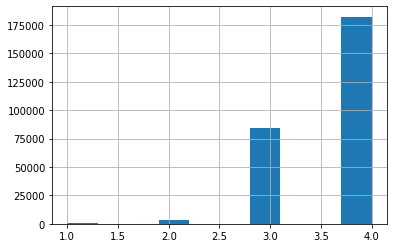

In [48]:
df['age_class'].hist();

### Вывод
На данном этапе были проделаны следующие действия:
1. Удалены неинформативные столбцы
2. В стоблце **Цена** были обнаружены и удалены аномалии, а также удалены пропущенные значения
3. в столбце **Год регистрации** были обнаружены и удалены аномалии, а в столбце **Месяц регистрации** нулевые значения заменены на 1(предполагается, что это ошибка)
5. В стоблце **Мощность** были обнаружены и удалены аномалии
6. В столбцах **Тип автомобильного кузова** и **Тип топлива** пропущенные значения были восстановлены по самым популярным среди таких же моделей у определенных брендов.
6. Оптимизирован датафрейм, он стал занимать меньше памяти на 75%

## Обучение моделей

### Деление на выборки

In [49]:
features = df.drop('price', axis=1)
target = df['price']
(features_train, features_test, 
 target_train, target_test) = train_test_split(features, target, train_size=0.75, random_state=2421)

In [50]:
(ohe_features_train, ohe_features_test, 
 ohe_target_train, ohe_target_test) = train_test_split(features, target, train_size=0.75, random_state=2421)

In [51]:
(oe_features_train, oe_features_test, 
 oe_target_train, oe_target_test) = train_test_split(features, target, train_size=0.75, random_state=2421)

In [52]:
ohe_features_train.shape, ohe_target_train.shape

((203092, 11), (203092,))

In [53]:
categorical_columns = df.columns[df.dtypes == 'object']
categorical_columns

Index(['vehicle_type', 'model', 'fuel_type', 'brand'], dtype='object')

In [54]:
encoder = OrdinalEncoder()
encoder.fit(oe_features_train[categorical_columns])

oe_features_train[categorical_columns] = encoder.transform(oe_features_train[categorical_columns])
oe_features_test[categorical_columns] = encoder.transform(oe_features_test[categorical_columns])

In [55]:
OH_encoder = OneHotEncoder(drop='first', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(ohe_features_train[categorical_columns]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(ohe_features_test[categorical_columns]))
OH_cols_train = OH_cols_train.apply(pd.to_numeric, downcast='integer')
OH_cols_valid = OH_cols_valid.apply(pd.to_numeric, downcast='integer')

OH_cols_train.index = ohe_features_train.index
OH_cols_valid.index = ohe_features_test.index


numeric_X_train = ohe_features_train.drop(categorical_columns, axis=1)
numeric_X_valid = ohe_features_test.drop(categorical_columns, axis=1)


ohe_features_train = pd.concat([numeric_X_train, OH_cols_train], axis=1)
ohe_features_test = pd.concat([numeric_X_valid, OH_cols_valid], axis=1)


<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, чтоe encoders обучены только на трейне

In [56]:
ohe_features_train

,registration_year,gearbox,power,kilometer,registration_month,repaired,age_class,0,1,2,...,291,292,293,294,295,296,297,298,299,300
184496,2007,False,110,150000,3,False,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
134981,2000,False,118,150000,6,False,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94337,2009,False,67,90000,5,False,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
212915,2007,False,109,150000,9,False,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
348092,2001,False,131,90000,10,False,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172684,1997,True,150,150000,5,False,3,0,0,0,...,0,0,0,0,1,0,0,0,0,0
36166,2006,False,200,30000,9,False,4,0,0,0,...,0,1,0,0,0,0,0,0,0,0
176888,1991,False,75,150000,10,False,3,0,0,0,...,0,0,0,0,1,0,0,0,0,0
116128,1999,False,75,150000,12,False,3,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [57]:
del OH_cols_train 
del OH_cols_valid 
del numeric_X_train 
del numeric_X_valid 

### Линейная регрессия

In [270]:
%%time
model = LinearRegression()
LR_dict = (cross_validate(model, 
                          ohe_features_train, 
                          ohe_target_train, 
                          cv=5, 
                          scoring='neg_root_mean_squared_error'))

CPU times: user 1min 15s, sys: 33 s, total: 1min 48s
Wall time: 1min 49s


In [271]:
LR_dict

{'fit_time': array([20.65354991, 23.08478546, 19.19319773, 22.1973691 , 18.90155864]),
 'score_time': array([1.7169826 , 1.00129557, 1.0000453 , 0.84149933, 0.84641886]),
 'test_score': array([-2344.27388163, -2325.42546332, -2344.56404483, -2338.89676064,
        -2311.92214188])}

In [272]:
RMSE_LR = LR_dict['test_score'].mean()*-1
fit_time_LR = LR_dict['fit_time'].mean()
score_time_LR = LR_dict['score_time'].mean()

### Ridge

In [274]:
model = Ridge()
ridge_dict = (cross_validate(model, 
                          ohe_features_train, 
                          ohe_target_train, 
                          cv=5, 
                          scoring='neg_root_mean_squared_error'))

In [275]:
ridge_dict

{'fit_time': array([4.7707026 , 5.26922035, 4.96884561, 4.68658185, 5.18354487]),
 'score_time': array([1.02847028, 1.03348827, 1.01443887, 1.00528288, 1.01916265]),
 'test_score': array([-2344.05131936, -2325.24303334, -2344.35648683, -2338.97596886,
        -2311.71773962])}

In [276]:
RMSE_ridge = ridge_dict['test_score'].mean()*-1
fit_time_ridge = ridge_dict['fit_time'].mean()
score_time_ridge = ridge_dict['score_time'].mean()

### DecisionTreeRegressor

In [277]:
%%time
param_grid = { 
    'max_features': ['log2', 'sqrt'],
    'max_depth' : [5, 7, 9], 
    "min_samples_leaf":[1,2,3],
}
model = DecisionTreeRegressor()
CV_dtr = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5, scoring='neg_root_mean_squared_error')
CV_dtr.fit(oe_features_train, oe_target_train)
means = CV_dtr.cv_results_['mean_test_score']
for mean, params in zip(means, CV_dtr.cv_results_['params']):
    print("%0.2f for %r"% ((mean*-1), params))
print("Лучшие параметры:")
print(CV_dtr.best_params_)

2698.33 for {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1}
2593.81 for {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 2}
2624.13 for {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 3}
2555.25 for {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1}
2781.57 for {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2}
2507.12 for {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3}
2301.27 for {'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 1}
2281.62 for {'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 2}
2301.60 for {'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 3}
2233.19 for {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1}
2254.53 for {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2}
2390.55 for {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 3}
2171.34 for {'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 1}
2102.62 for 

In [278]:
results_dtr = pd.DataFrame(CV_dtr.cv_results_)
results_dtr.sort_values(by='rank_test_score').head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
15,0.220666,0.00391,0.030074,0.000379,9,sqrt,1,"{'max_depth': 9, 'max_features': 'sqrt', 'min_...",-2026.077283,-2010.940805,-2192.190471,-1988.341044,-2061.15422,-2055.740765,72.218431,1


### RandomForestRegressor

In [279]:
%%time
param_grid = { 
    'n_estimators': [20, 40],
    'max_depth' : [5, 7, 9], 
}
model = RandomForestRegressor()
CV_rfc = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5, scoring='neg_root_mean_squared_error')
CV_rfc.fit(oe_features_train, oe_target_train)
means = CV_rfc.cv_results_['mean_test_score']
for mean,params in zip(means, CV_rfc.cv_results_['params']):
    print("%0.2f for %r"% ((mean*-1), params))
print("Лучшие параметры:")
print(CV_rfc.best_params_)

2160.66 for {'max_depth': 5, 'n_estimators': 20}
2158.95 for {'max_depth': 5, 'n_estimators': 40}
1915.52 for {'max_depth': 7, 'n_estimators': 20}
1915.81 for {'max_depth': 7, 'n_estimators': 40}
1762.48 for {'max_depth': 9, 'n_estimators': 20}
1758.99 for {'max_depth': 9, 'n_estimators': 40}
Лучшие параметры:
{'max_depth': 9, 'n_estimators': 40}
CPU times: user 3min 4s, sys: 1.76 s, total: 3min 6s
Wall time: 3min 6s


In [280]:
results_rfc = pd.DataFrame(CV_rfc.cv_results_)
results_rfc.sort_values(by='rank_test_score').head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,9.260593,0.114518,0.150554,0.002886,9,40,"{'max_depth': 9, 'n_estimators': 40}",-1752.896247,-1767.047752,-1757.506938,-1766.034768,-1751.477712,-1758.992683,6.485736,1


### LGBMRegressor

In [281]:
features_train[categorical_columns] = features_train[categorical_columns].astype('category')

In [282]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203092 entries, 184496 to 86121
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   vehicle_type        203092 non-null  category
 1   registration_year   203092 non-null  int16   
 2   gearbox             203092 non-null  bool    
 3   power               203092 non-null  int16   
 4   model               203092 non-null  category
 5   kilometer           203092 non-null  int32   
 6   registration_month  203092 non-null  int8    
 7   fuel_type           203092 non-null  category
 8   brand               203092 non-null  category
 9   repaired            203092 non-null  bool    
 10  age_class           203092 non-null  int64   
dtypes: bool(2), category(4), int16(2), int32(1), int64(1), int8(1)
memory usage: 6.2 MB


In [283]:
%%time

regressor = LGBMRegressor() 
hyperparams = [{'learning_rate':[0.1, 0.3, 0.5],
               'num_leaves': [21, 31, 41]}]
clf = GridSearchCV(regressor, hyperparams, scoring='neg_root_mean_squared_error')
clf.fit(features_train, target_train)
means = clf.cv_results_['mean_test_score']
for mean, params in zip(means, clf.cv_results_['params']):
    print("%0.2f for %r"% ((mean*-1), params))
print("Лучшие параметры:")
print(clf.best_params_)

1487.69 for {'learning_rate': 0.1, 'num_leaves': 21}
1465.46 for {'learning_rate': 0.1, 'num_leaves': 31}
1451.59 for {'learning_rate': 0.1, 'num_leaves': 41}
1458.24 for {'learning_rate': 0.3, 'num_leaves': 21}
1446.22 for {'learning_rate': 0.3, 'num_leaves': 31}
1434.36 for {'learning_rate': 0.3, 'num_leaves': 41}
1467.53 for {'learning_rate': 0.5, 'num_leaves': 21}
1458.70 for {'learning_rate': 0.5, 'num_leaves': 31}
1454.20 for {'learning_rate': 0.5, 'num_leaves': 41}
Лучшие параметры:
{'learning_rate': 0.3, 'num_leaves': 41}
CPU times: user 5min 5s, sys: 0 ns, total: 5min 5s
Wall time: 5min 10s


In [284]:
results_LGBM = pd.DataFrame(clf.cv_results_)
results_LGBM.sort_values(by='rank_test_score').head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_num_leaves,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,5.43609,0.711799,0.365222,0.045253,0.3,41,"{'learning_rate': 0.3, 'num_leaves': 41}",-1425.021392,-1444.623753,-1439.944235,-1441.369815,-1420.848421,-1434.361523,9.543984,1


### Вывод
В данном пункте я обучи несколько моделей, а также потюнил их гиперпараметры. По метрике RMSE LGBMRegressor дал наилучшие реультаты среди всех моделей. Перейдем к анализу моделей.

## Анализ моделей

In [291]:
index = ['LinearRegression',
        'Ridge',
        'DecisionTreeRegressor',
        'RandomForestRegressor',
        'LGBMRegressor'    
        ]
data = { 
    'RMSE модели на кросс-валидации':[RMSE_LR,
                                       RMSE_ridge,
                                       CV_dtr.best_score_*-1,
                                       CV_rfc.best_score_*-1,
                                       clf.best_score_*-1,],
    'Время обучения модели, сек':[fit_time_LR,
                                  fit_time_ridge,
                                  0.220,
                                  9.26,
                                  5.436],
    'Время предсказания модели, сек':[score_time_LR,
                                      score_time_ridge,
                                      0.03,
                                      0.15,
                                      0.365]
}
result = pd.DataFrame(data=data, index=index)
result

,RMSE модели на кросс-валидации,"Время обучения модели, сек","Время предсказания модели, сек"
LinearRegression,2333.016458,20.806092,1.081248
Ridge,2332.868910,4.975779,1.020169
DecisionTreeRegressor,2055.740765,0.220000,0.030000
RandomForestRegressor,1758.992683,9.260000,0.150000
LGBMRegressor,1434.361523,5.436000,0.365000


### Вывод
Анализ показал следующие результаты:
1. По метрике RMSE наилучшим образом себя показал **LGBMRegressor**. RMSE = 1434.362, ондако эта модель сильно отстает по времени обучения и времени предсказания от лидера в этих категориях.
2. По времени обучения и времени предсказания лидирует **DecisionTreeRegressor**. Время ее обучение и предсказния занимает всего 0.237 секунды! RMSE при этом остается в заданных для задачи рамках.

Так как в данном проекте нет метрики, объединяющие в себе RMSE и время, то я как аналитик предложил бы использовать эти модели в зависимости от того что нужно: точность или быстрота.

 Однако так как мне необходимо выбрать одну модель я выберу **LGBMRegressor**, т. к. необходимо минимизировать RMSE, и проверю на тестовой выборке.

## Тест модели

In [287]:
features_test[categorical_columns] = features_test[categorical_columns].astype('category')

In [288]:
print("RMSE LGBMRegressor на тесте:",mean_squared_error(
    target_test,clf.best_estimator_.predict(features_test),
    squared=False))

RMSE LGBMRegressor на тесте: 1429.7827382808478


## Общий вывод

В ходе данного проекта были:
1. Изучены данные, устранены аномалии и заполнены пропуски. Также датафрейм был оптимизирован для вычислений.
2. Датасет был разбит на выборки с разными видами кодирования.Были обучены различные модели:
- линейные 
- деревья
- градиентный бустинг

Для них были были отобраны наилучшие параметры при помощи Gridsearch.


3. Были проанализированы метрики лучших моделей, а также время обучения и предсказания. Лучшими моделями оказались **DecisionTreeRegressor и DecisionTreeRegressor**


4. Для финального теста по результатам я выбрал LGBMRegressor и значение **RMSE** на тесте = **1429.782**

In [292]:
result.loc[['LGBMRegressor', 'DecisionTreeRegressor']]

,RMSE модели на кросс-валидации,"Время обучения модели, сек","Время предсказания модели, сек"
LGBMRegressor,1434.361523,5.436,0.365
DecisionTreeRegressor,2055.740765,0.220,0.030


In [290]:
pd.DataFrame({'col_name': clf.best_estimator_.feature_importances_}, 
             index=features_train.columns).sort_values(by='col_name', 
                                                       ascending=False)


,col_name
registration_year,987
power,939
model,735
kilometer,384
registration_month,359
brand,254
vehicle_type,154
gearbox,69
fuel_type,62
repaired,57


Как можно видеть, больше всего влияет год регистрации, мощность и модель.